In [1]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
import math
from scipy.integrate import odeint

# Modelling population turnover

In our previous SIR model, we have assumed a closed population, i.e. one where no one dies and no babies are born. In terms of the epidemic dynamics, that has meant that as more and more people become infected and recovered, the pool of susceptibles continually decreases, and thus so too does the effective reproduction number. This is fine for diseases with short infectious periods, that spread through a population more quickly than the population is able to renew itself. But what about longer timescales?

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


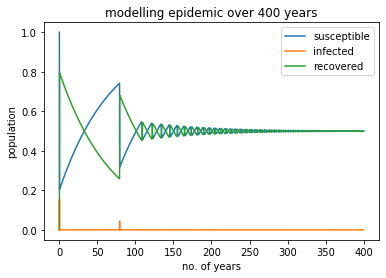

In [2]:

betta=0.4*365 # Daily infection rate
nu=0.2*365
mu=1/(70)
r0=betta/nu
b=1/(70)
pop=1000000
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda)-u[0]*mu+b*pop,u[0]*lamda-nu*u[1]-u[1]*mu,u[1]*nu-u[2]*mu])
x=np.linspace(0,400,400*365)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.title("modelling epidemic over 400 years")
plt.xlabel("no. of years")
plt.ylabel("population")
plt.legend()
plt.show()

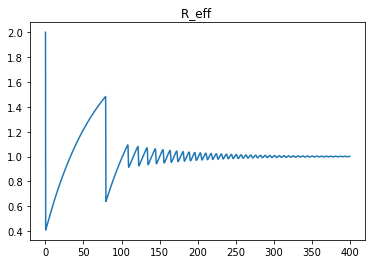

In [3]:
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()

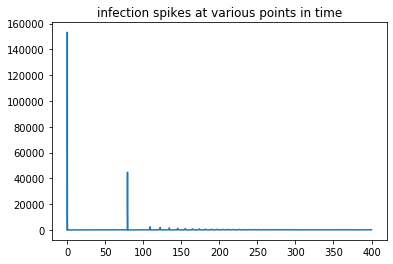

In [4]:
plt.title("infection spikes at various points in time")
plt.plot(x,y[:,1])
plt.show()

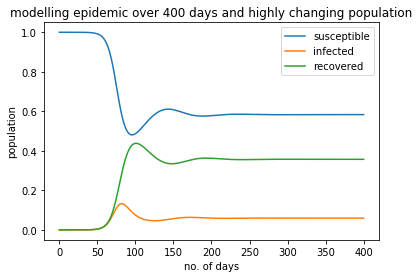

In [5]:
betta=0.4 # Daily infection rate
nu=0.2
mu=1/(30)
r0=betta/nu
b=1/(30)
pop=1000000
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda)-u[0]*mu+b*pop,u[0]*lamda-nu*u[1]-u[1]*mu,u[1]*nu-u[2]*mu])
x=np.linspace(0,400,400)
y0=[999999,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.title("modelling epidemic over 400 days and highly changing population")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

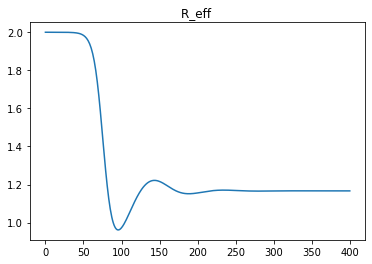

In [6]:
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()

# A simple model for vaccination

By changing the initial conditions, we can prepare the population so that it has received a certain coverage of vaccination. Even though this is very simplistic, it will allow us to study some important effects of vaccination on the infection dynamics.

We are starting with the transmission and recovery parameters *beta* = 0.4 days$^{-1}$ and *gamma* = 0.1 days $^{-1}$. To incorporate immunity from vaccination in the model, we assume that a proportion *p* of the total population starts in the recovered compartment, representing the vaccine coverage and assuming the vaccine is perfectly effective. Again, we assume the epidemic starts with a single infected case introduced into the population.

Model this scenario for a duration of 2 years, assuming that the vaccine coverage is 50%, and plot the prevalence in each compartment over time. Confirm that you observe an epidemic peaking at around 125 days after introduction of the infectious person in the population. Also have a look at the proportion susceptible and recovered, to double-check this looks like what you would expect given your initial conditions.

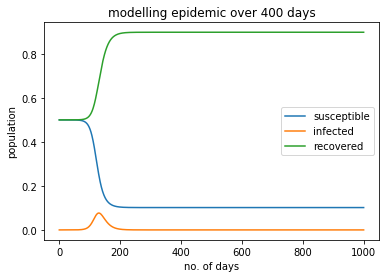

In [7]:
betta=0.4 # Daily infection rate
nu=0.1
r0=betta/nu
pop=1000000
p=0.5
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda),u[0]*lamda-nu*u[1],u[1]*nu])
x=np.linspace(0,1000,999)
y0=[999999*(1-p),1,p*(999999)]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.title("modelling epidemic over 400 days")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

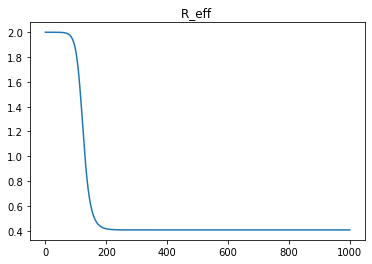

In [8]:
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()

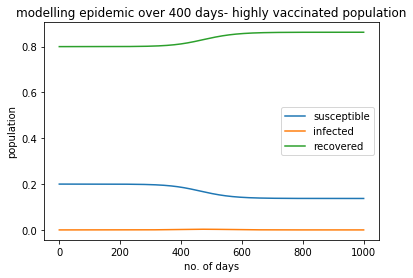

In [9]:
betta=0.6 # Daily infection rate
nu=0.1
r0=betta/nu
pop=1000000
p=0.8
def du_dt(u,t):
    lamda=betta*u[1]/pop
    return([-u[0]*(lamda),u[0]*lamda-nu*u[1],u[1]*nu])
x=np.linspace(0,1000,999)
y0=[999999*(1-p),1,p*(999999)]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.title("modelling epidemic over 400 days- highly vaccinated population")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()